In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [143]:
df = pd.read_csv("food_order.csv")
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [144]:
# checking for null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [146]:
# checking the shape of dataset
df.shape

(1898, 9)

In [147]:
df['rating'] = df['rating'].replace('Not given',None)

# changing the data type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [148]:
df.drop(['customer_id'], axis = 1, inplace= True)

In [149]:
df.head()

,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [150]:
# handling missing values
df['rating'].fillna(df['rating'].median(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_20980\2517361290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(),inplace=True)


In [151]:
df.head()

,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,Hangawi,Korean,30.75,Weekend,5.0,25,20
1,1477685,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5.0,25,23
2,1477070,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [152]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

print(df['food_preparation_time'].max())

35


In [153]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rye House                      1
Hiroko's Place                 1
Frank Restaurant               1
Sarabeth's West                1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [154]:
df['cost_category'] = pd.cut(df['cost_of_the_order'],
                             bins=[0, 100, 300, 1000],
                             labels=['Low','Medium','High'])
print(df.head())
df.shape


print(df['rating'].unique)

   order_id            restaurant_name cuisine_type  cost_of_the_order  \
0   1477147                    Hangawi       Korean              30.75   
1   1477685  Blue Ribbon Sushi Izakaya     Japanese              12.08   
2   1477070                Cafe Habana      Mexican              12.23   
3   1477334  Blue Ribbon Fried Chicken     American              29.20   
4   1478249           Dirty Bird to Go     American              11.59   

  day_of_the_week  rating  food_preparation_time  delivery_time  total_time  \
0         Weekend     5.0                     25             20          45   
1         Weekend     5.0                     25             23          48   
2         Weekday     5.0                     23             28          51   
3         Weekend     3.0                     25             15          40   
4         Weekday     4.0                     25             24          49   

  cost_category  
0           Low  
1           Low  
2           Low  
3       

C:\Users\hp\AppData\Local\Temp\ipykernel_20980\935892260.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery = df.groupby('cost_bin')['delivery_time'].mean().reset_index()


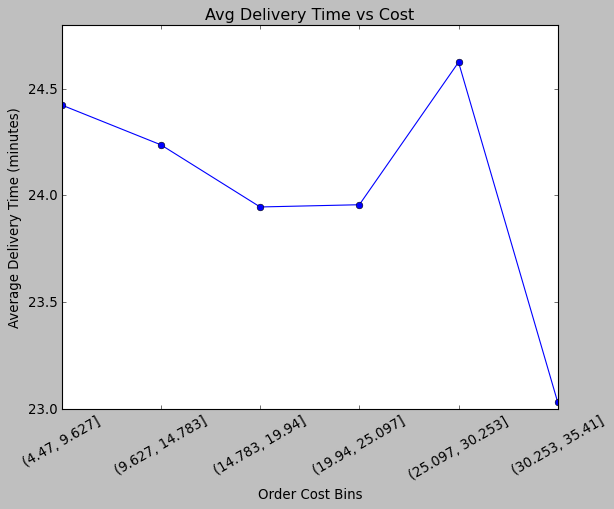

In [155]:
#Group data into bins of cost
cost_bins = np.linspace(df['cost_of_the_order'].min(), df['cost_of_the_order'].max(), 7)
df['cost_bin'] = pd.cut(df['cost_of_the_order'], bins=cost_bins)

avg_delivery = df.groupby('cost_bin')['delivery_time'].mean().reset_index()

# Plot

plt.plot(avg_delivery['cost_bin'].astype(str),
         avg_delivery['delivery_time'],
         color='blue', linestyle='-', marker='o', markersize=6,
         label="Average Delivery Time")

plt.xlabel("Order Cost Bins")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Avg Delivery Time vs Cost")
plt.xticks(rotation=30)
plt.show()

**Avg Delivery Time vs Cost**

**General Trend**

Delivery times remain fairly stable across most cost categories, generally hovering between 24–25 minutes.

**Low to Mid Cost Orders**

Orders in the lowest cost ranges (under ~20) have delivery times around 24–24.5 minutes.

Mid-range costs (~20–25) show slightly lower times (~24 minutes).

**High Cost Orders**

At the 30–35 cost range, delivery time spikes to ~24.7 minutes.

Interestingly, the highest cost bin (>35) shows the lowest average delivery time (~23 minutes).

**Interpretation**

No strong correlation between cost and delivery time → cost of order does not appear to impact delivery speed significantly.

The dip at the highest cost level might reflect priority service for premium/high-value orders.

C:\Users\hp\AppData\Local\Temp\ipykernel_20980\901597975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rest.index, x=top_rest.values, palette="Set2")


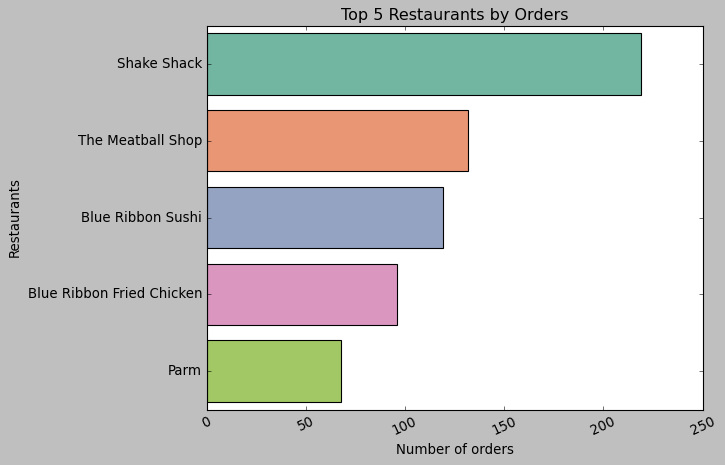

In [170]:
# most popular restaurants

top_rest = df['restaurant_name'].value_counts().nlargest(5)
sns.barplot(y=top_rest.index, x=top_rest.values, palette="Set2")
plt.title("Top 5 Restaurants by Orders")
plt.ylabel('Restaurants')
plt.xlabel("Number of orders")
plt.xticks(rotation=25)
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'American'),
  Text(1, 0, 'Chinese'),
  Text(2, 0, 'French'),
  Text(3, 0, 'Indian'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Japanese')])

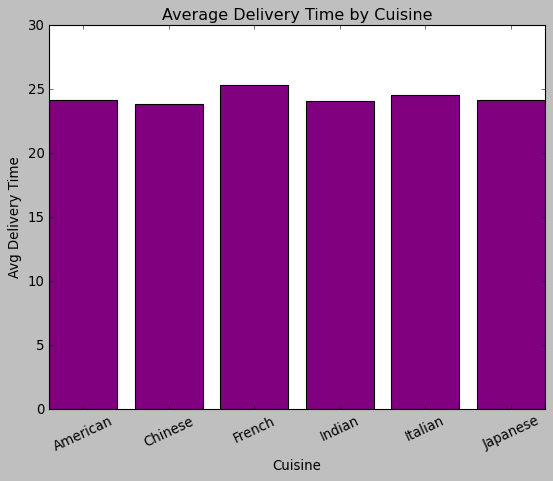

In [165]:
# service speed across different cuisines
avg_delivery = df.groupby('cuisine_type')['delivery_time'].mean().head(6)

plt.bar(avg_delivery.index, avg_delivery.values, color='purple')
plt.title("Average Delivery Time by Cuisine")
plt.xlabel('Cuisine')
plt.ylabel("Avg Delivery Time")
plt.xticks(rotation=25)

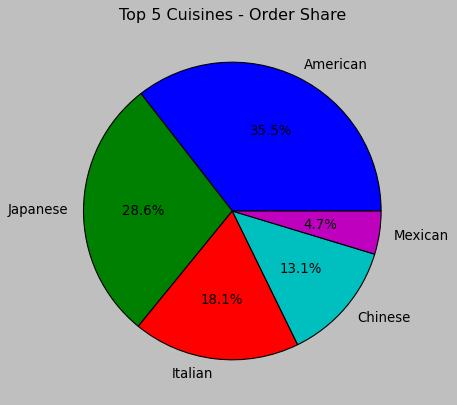

In [158]:
cuisine_counts = df['cuisine_type'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(cuisine_counts.values,
        labels=cuisine_counts.index,
        autopct="%.1f%%")
plt.title("Top 5 Cuisines - Order Share")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20980\3479495292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cuisine_type", data=df, order=df['cuisine_type'].value_counts().index, palette="Set2")


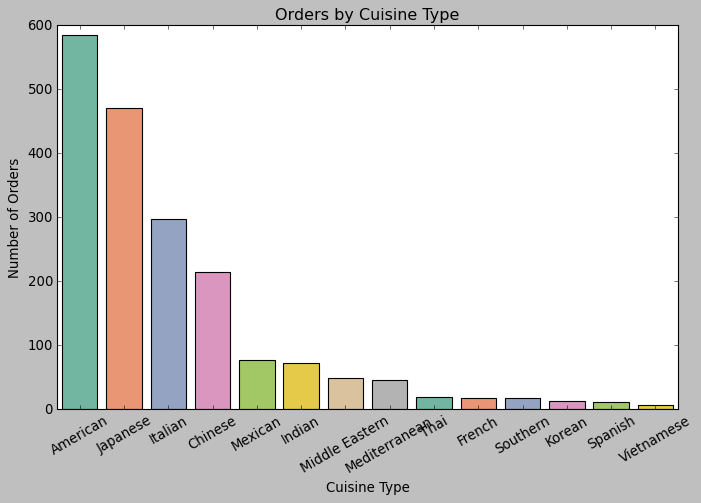

In [159]:
plt.figure(figsize=(10,6))
sns.countplot(x="cuisine_type", data=df, order=df['cuisine_type'].value_counts().index, palette="Set2")
plt.title("Orders by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20980\3949521092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cuisine_type", y="delivery_time", data=df, palette="Pastel1")


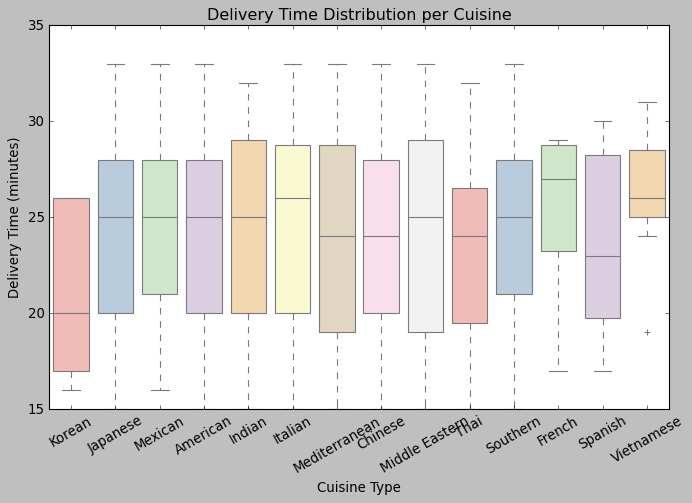

In [160]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cuisine_type", y="delivery_time", data=df, palette="Pastel1")
plt.title("Delivery Time Distribution per Cuisine")
plt.xlabel("Cuisine Type")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation=30)
plt.show()


**Median Delivery Times**

Most cuisines have a median delivery time between 23–26 minutes.

Korean cuisine has the lowest median (~20 minutes).

French and Vietnamese cuisines show slightly higher medians (~26–27 minutes).

Spread (IQR)

Most cuisines have an interquartile range (IQR) of ~5–7 minutes, showing consistency.

French and Vietnamese have wider spreads, indicating more variability.

**Outliers**

A few outliers appear in cuisines like Spanish and Vietnamese, where delivery times go well beyond the whiskers (~35+ minutes).

These could represent unusual delays.

**Comparison**

Korean cuisine is the most efficient and consistent.

French, Vietnamese, Italian cuisines tend to be slower with more variation.

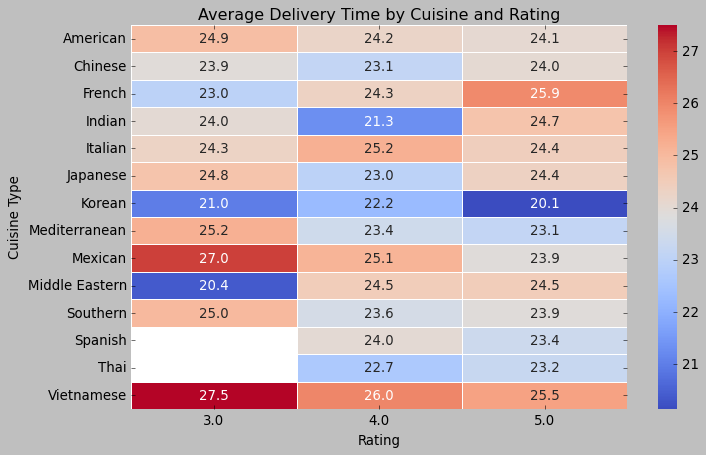

In [161]:
pivot = df.pivot_table(values="delivery_time", index="cuisine_type", columns="rating", aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Delivery Time by Cuisine and Rating")
plt.xlabel("Rating")
plt.ylabel("Cuisine Type")
plt.show()


General Trend

Most cuisines have delivery times between 23–25 minutes, regardless of rating.

Suggests delivery efficiency is fairly consistent across customer satisfaction levels.

Fastest Delivery Times

Korean cuisine has the lowest delivery times across all ratings (as low as ~20 mins at rating 5).

Middle Eastern cuisine also shows relatively quick deliveries (~20–24 mins).

Longest Delivery Times

Mexican cuisine shows higher delivery times (25–27 mins), especially at lower ratings.

Vietnamese cuisine has the highest recorded delivery time (~27.5 mins at rating 3).

Impact of Rating on Delivery Time

In some cuisines (like Korean), higher ratings correlate with faster delivery (20.1 mins at 5-star vs 21–22 mins at lower ratings).

In others (like French, Italian, Vietnamese), delivery times remain higher even with good ratings.

C:\Users\hp\AppData\Local\Temp\ipykernel_20980\3747862122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cuisine_type", y="delivery_time", data=df, ax=axes[0], palette="Set3")
C:\Users\hp\AppData\Local\Temp\ipykernel_20980\3747862122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="food_preparation_time", data=df, ax=axes[1], palette="pastel")


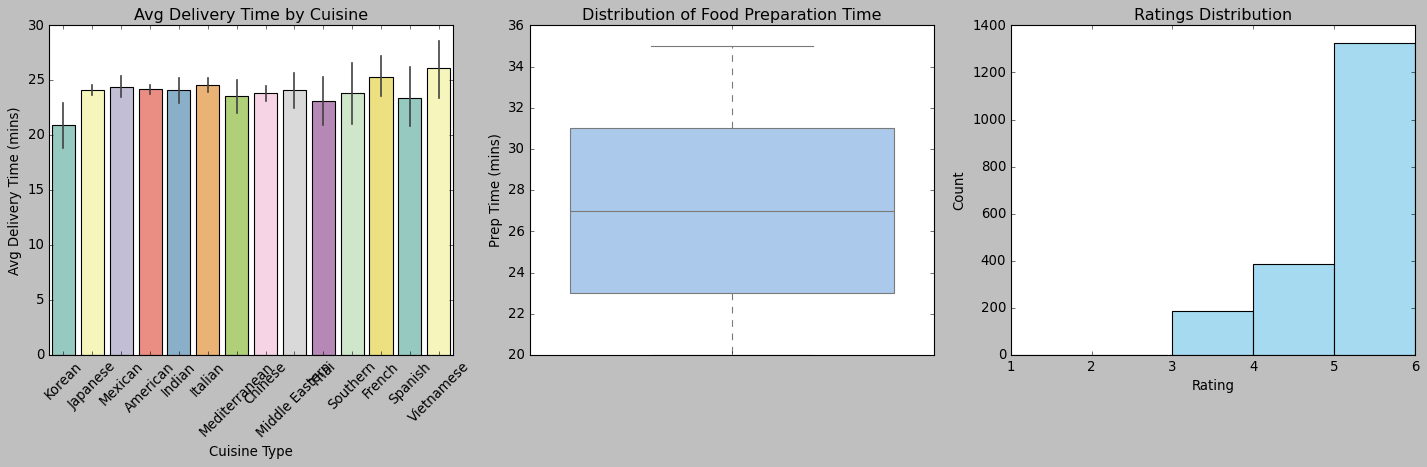

In [171]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

#  Avg Delivery Time by Cuisine
sns.barplot(x="cuisine_type", y="delivery_time", data=df, ax=axes[0], palette="Set3")
axes[0].set_title("Avg Delivery Time by Cuisine")
axes[0].set_xlabel("Cuisine Type")
axes[0].set_ylabel("Avg Delivery Time (mins)")
axes[0].tick_params(axis='x', rotation=45)

# Food Preparation Time
sns.boxplot(y="food_preparation_time", data=df, ax=axes[1], palette="pastel")
axes[1].set_title("Distribution of Food Preparation Time")
axes[1].set_ylabel("Prep Time (mins)")

#  Ratings
sns.histplot(df["rating"], bins=[1,2,3,4,5,6], kde=False, ax=axes[2], color="skyblue", edgecolor="black")
axes[2].set_title("Ratings Distribution")
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


Avg Delivery Time by Cuisine

Most cuisines fall between 22–26 minutes.

Korean cuisine has the lowest average (~21 mins).

French and Vietnamese cuisines are slightly higher (~25–26 mins).

Overall, delivery times are fairly consistent with small variations.

Distribution of Food Preparation Time

Median prep time is around 27 minutes.

Majority of values are within 23–31 minutes (IQR).

A few outliers above 35 minutes indicate occasional long prep times.

Prep times are generally stable, but restaurants should review delays.

Ratings Distribution

Ratings are skewed toward 5 stars (most are 5).

Some 4-star ratings, very few 3-star or lower.

Customers are generally highly satisfied with service.